**Processing the data of neighbouring countries**

In [5]:
import pandas as pd
import numpy as np
import calendar
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [6]:
columns_of_interest = ["cases_per_capita", 'deaths_per_capita', 'delta_cases_per_capita', 'delta_deaths_per_capita']

In [7]:
def process_data(country, columns_of_interest):
    data = pd.read_csv(f"Data/owid-covid-data_{country}.csv", index_col = "date")
    data = data[(data.index >= "2020-03-01") & (data.index <= "2021-11-01")]
    data.index = pd.DatetimeIndex(data.index)
    country_data = data[data['location'] == country]
    country_data['cases_per_capita'] = country_data['total_cases']/country_data['population']
    country_data['delta_cases_per_capita'] = country_data['cases_per_capita'].diff()
    country_data['deaths_per_capita'] = country_data['total_deaths']/country_data['population']
    country_data['delta_deaths_per_capita'] = country_data['deaths_per_capita'].diff()
    country_data = country_data.loc[:, columns_of_interest] 
    for column in country_data.columns:
        country_data.rename(columns = {column: column + f'_{country}'}, inplace = True)
    return country_data

In [8]:
UK_data = process_data("United Kingdom", columns_of_interest)
Germany_data = process_data("Germany", columns_of_interest)
France_data = process_data("France", columns_of_interest)
Ireland_data = process_data("Ireland", columns_of_interest)

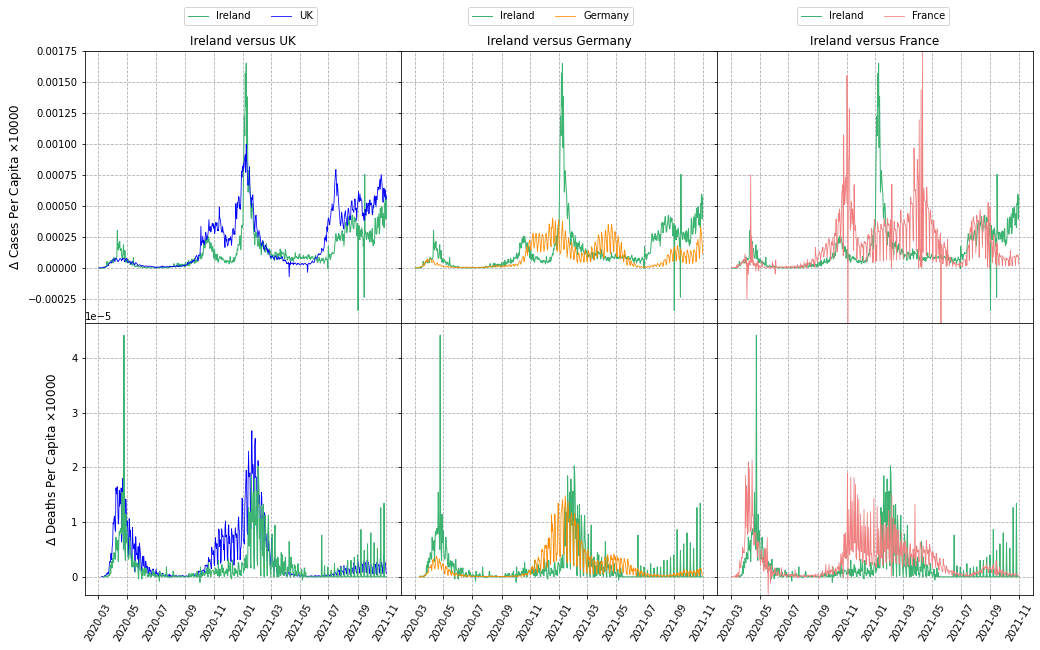

In [9]:
fig, ax = plt.subplots(ncols = 3, nrows = 2, sharey = False,sharex= True,gridspec_kw={"wspace": 0, 'hspace': 0})


fig.set_size_inches(17, 10)

ax[0, 0].plot(Ireland_data['delta_cases_per_capita_Ireland'], color = 'mediumseagreen', linewidth = 1, label= "Ireland")
ax[0, 0].plot(UK_data['delta_cases_per_capita_United Kingdom'], color = 'blue', linewidth = 0.8, label = "UK")


ax[0, 1].plot(Ireland_data['delta_cases_per_capita_Ireland'], color = 'mediumseagreen', linewidth = 1, label=  "Ireland")
ax[0, 1].plot(Germany_data['delta_cases_per_capita_Germany'], color = 'darkorange', linewidth = 0.8, label = "Germany")
ax[0, 1].set_ylim(-0.001, 0.002)
ax[0, 1].set_ylim(ax[0, 0].get_ylim())

ax[0, 1].set_yticklabels("")
ax[0, 2].set_yticklabels("")

ax[0, 2].plot(Ireland_data['delta_cases_per_capita_Ireland'], color = 'mediumseagreen', linewidth = 1, label=  "Ireland")
ax[0, 2].plot(France_data['delta_cases_per_capita_France'], color = 'lightcoral', linewidth = 0.8, label=  "France")
ax[0, 2].set_ylim(ax[0, 0].get_ylim())

ax[0, 0].set_title("Ireland versus UK")
ax[0, 1].set_title("Ireland versus Germany")
ax[0, 2].set_title("Ireland versus France")

ax[0, 0].set_ylabel(r"$\Delta$ Cases Per Capita $\times 10000$", fontsize = 12)
ax[1, 0].set_ylabel(r"$\Delta$ Deaths Per Capita $\times 10000$", fontsize = 12, labelpad = 10)


ax[0, 0].grid(linestyle = '--')
ax[0, 1].grid(linestyle = '--')
ax[0, 2].grid(linestyle = '--')
ax[1, 0].grid(linestyle = '--')
ax[1, 1].grid(linestyle = '--')
ax[1, 2].grid(linestyle = '--')
# axes = [[]]
for num in range(0, 3):

    for tick in ax[1, num].get_xticklabels():
        tick.set_rotation(60)
#     # ax[num].grid()
#     # ax[0, num].set_xlabel("Date", fontsize = 12)


ax[1, 0].plot(UK_data['delta_deaths_per_capita_United Kingdom'], color = 'blue', linewidth = 0.8)
# ax[0].plot(Germany_data['cases_per_capita_Germany'])
# ax[0].plot(France_data['cases_per_capita_France'])
ax[1, 0].plot(Ireland_data['delta_deaths_per_capita_Ireland'], color = 'mediumseagreen', linewidth = 1)

ax[1, 1].plot(Ireland_data['delta_deaths_per_capita_Ireland'], color = 'mediumseagreen', linewidth = 1)
ax[1, 1].plot(Germany_data['delta_deaths_per_capita_Germany'], color = 'darkorange', linewidth = 0.8)
ax[1, 1].set_ylim(-0.001, 0.002)
ax[1, 1].set_ylim(ax[1, 0].get_ylim())

ax[1, 1].set_yticklabels("")
ax[1, 2].set_yticklabels("")

ax[1, 2].plot(Ireland_data['delta_deaths_per_capita_Ireland'], color = 'mediumseagreen', linewidth = 1)
ax[1, 2].plot(France_data['delta_deaths_per_capita_France'], color = 'lightcoral', linewidth = 0.8)
ax[1, 2].set_ylim(ax[1, 0].get_ylim())

ax[0, 0].legend(bbox_to_anchor = (0.75, 1.18), ncol = 2)
ax[0, 1].legend(bbox_to_anchor = (0.75, 1.18), ncol = 2)
ax[0, 2].legend(bbox_to_anchor = (0.75, 1.18), ncol = 2)

In [10]:
cases = pd.DataFrame([Ireland_data["delta_cases_per_capita_Ireland"], UK_data["delta_cases_per_capita_United Kingdom"], Germany_data["delta_cases_per_capita_Germany"], France_data["delta_cases_per_capita_France"]]).transpose()

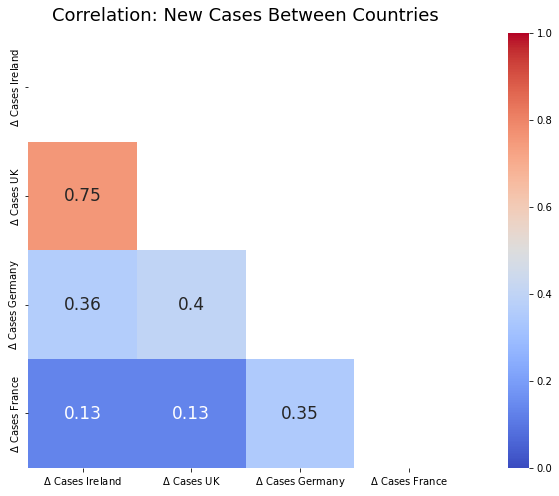

In [11]:
import seaborn as sns
plt.figure(figsize = (16, 8))

mask = np.triu(np.ones_like(cases.corr(), dtype=bool))

axis_labels = [r'$\Delta$ Cases Ireland', r'$\Delta$ Cases UK', r'$\Delta$ Cases Germany', r'$\Delta$ Cases France'] # labels for x-axis

heatmap = sns.heatmap(cases.corr(), mask = mask, annot = True, cmap = "coolwarm", vmin = 0, vmax = 1, xticklabels=axis_labels, yticklabels=axis_labels,  annot_kws={"size": 17}, square = True)
heatmap.set_title('Correlation: New Cases Between Countries', fontdict={'fontsize':18}, pad=12);




In [12]:
deaths = pd.DataFrame([Ireland_data["delta_deaths_per_capita_Ireland"], UK_data["delta_deaths_per_capita_United Kingdom"], Germany_data["delta_deaths_per_capita_Germany"], France_data["delta_deaths_per_capita_France"]]).transpose()

In [13]:
deaths.dropna(how = 'any', inplace = True)

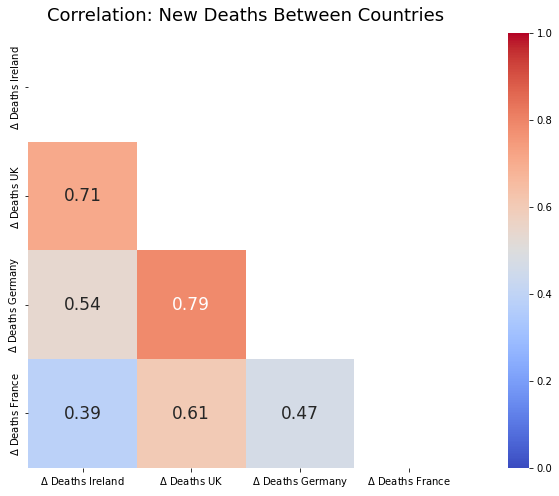

In [14]:
import seaborn as sns
plt.figure(figsize = (16, 8))

mask = np.triu(np.ones_like(deaths.corr(), dtype=bool))

axis_labels = [r'$\Delta$ Deaths Ireland', r'$\Delta$ Deaths UK', r'$\Delta$ Deaths Germany', r'$\Delta$ Deaths France'] # labels for x-axis

heatmap = sns.heatmap(deaths.corr(), mask = mask, annot = True, cmap = "coolwarm", vmin = 0, vmax = 1, xticklabels=axis_labels, yticklabels=axis_labels, annot_kws={"size": 17}, square = True)
heatmap.set_title('Correlation: New Deaths Between Countries', fontdict={'fontsize':18}, pad=12);